# Decision Trees: Fundamentals

## Overview

**Decision Trees** are non-parametric supervised learning algorithms used for both classification and regression. They learn simple decision rules inferred from data features, creating a tree-like model of decisions.

## Key Concepts

### Tree Structure

- **Root Node**: Top of the tree, represents entire dataset
- **Internal Nodes**: Decision points (splits)
- **Branches**: Outcomes of decisions
- **Leaf Nodes**: Final predictions (terminal nodes)

### Splitting Criteria

**Classification (Impurity Measures)**:

**Gini Impurity**:
\[
Gini = 1 - \sum_{i=1}^{C} p_i^2
\]
where \(p_i\) is probability of class \(i\), \(C\) is number of classes.

**Entropy (Information Gain)**:
\[
Entropy = -\sum_{i=1}^{C} p_i \log_2(p_i)
\]

**Regression (Variance Reduction)**:

**Mean Squared Error**:
\[
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \bar{y})^2
\]

### Decision Rule

At each node, find the best split:
\[
\text{Best split} = \arg\min_{feature, threshold} [Impurity_{left} + Impurity_{right}]
\]

## Topics Covered

1. Decision Tree Classification
2. Decision Tree Regression
3. Tree visualization and interpretation
4. Hyperparameter tuning (depth, samples, impurity)
5. Overfitting and pruning
6. Feature importance
7. Real-world applications

## Setup and Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV, validation_curve
)
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_squared_error, r2_score, mean_absolute_error
)
from sklearn.datasets import (
    make_classification, make_regression, load_iris, load_wine,
    load_breast_cancer, load_diabetes
)
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
sns.set_style('whitegrid')
print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Decision Tree Classification

### 1.1 Simple Binary Classification Example

In [2]:
# Generate synthetic data
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

print("Binary Classification Dataset")
print("="*70)
print(f"Samples: {X.shape[0]}")
print(f"Features: {X.shape[1]}")
print(f"Classes: {np.unique(y)}")
print(f"Class distribution: {np.bincount(y)}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTrain: {X_train.shape[0]}, Test: {X_test.shape[0]}")

Binary Classification Dataset
Samples: 200
Features: 2
Classes: [0 1]
Class distribution: [100 100]

Train: 140, Test: 60


In [3]:
# Train decision tree
tree_clf = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)
tree_clf.fit(X_train, y_train)

print("Decision Tree Classifier")
print("="*70)
print(f"Tree depth: {tree_clf.get_depth()}")
print(f"Number of leaves: {tree_clf.get_n_leaves()}")
print(f"Number of features: {tree_clf.n_features_in_}")

# Predictions
y_pred = tree_clf.predict(X_test)
y_proba = tree_clf.predict_proba(X_test)

# Evaluate
train_acc = tree_clf.score(X_train, y_train)
test_acc = tree_clf.score(X_test, y_test)

print(f"\nPerformance:")
print(f"  Train Accuracy: {train_acc:.4f}")
print(f"  Test Accuracy:  {test_acc:.4f}")

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Classifier
Tree depth: 3
Number of leaves: 8
Number of features: 2

Performance:
  Train Accuracy: 0.8714
  Test Accuracy:  0.8500

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        30
           1       0.80      0.93      0.86        30

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



### 1.2 Tree Visualization

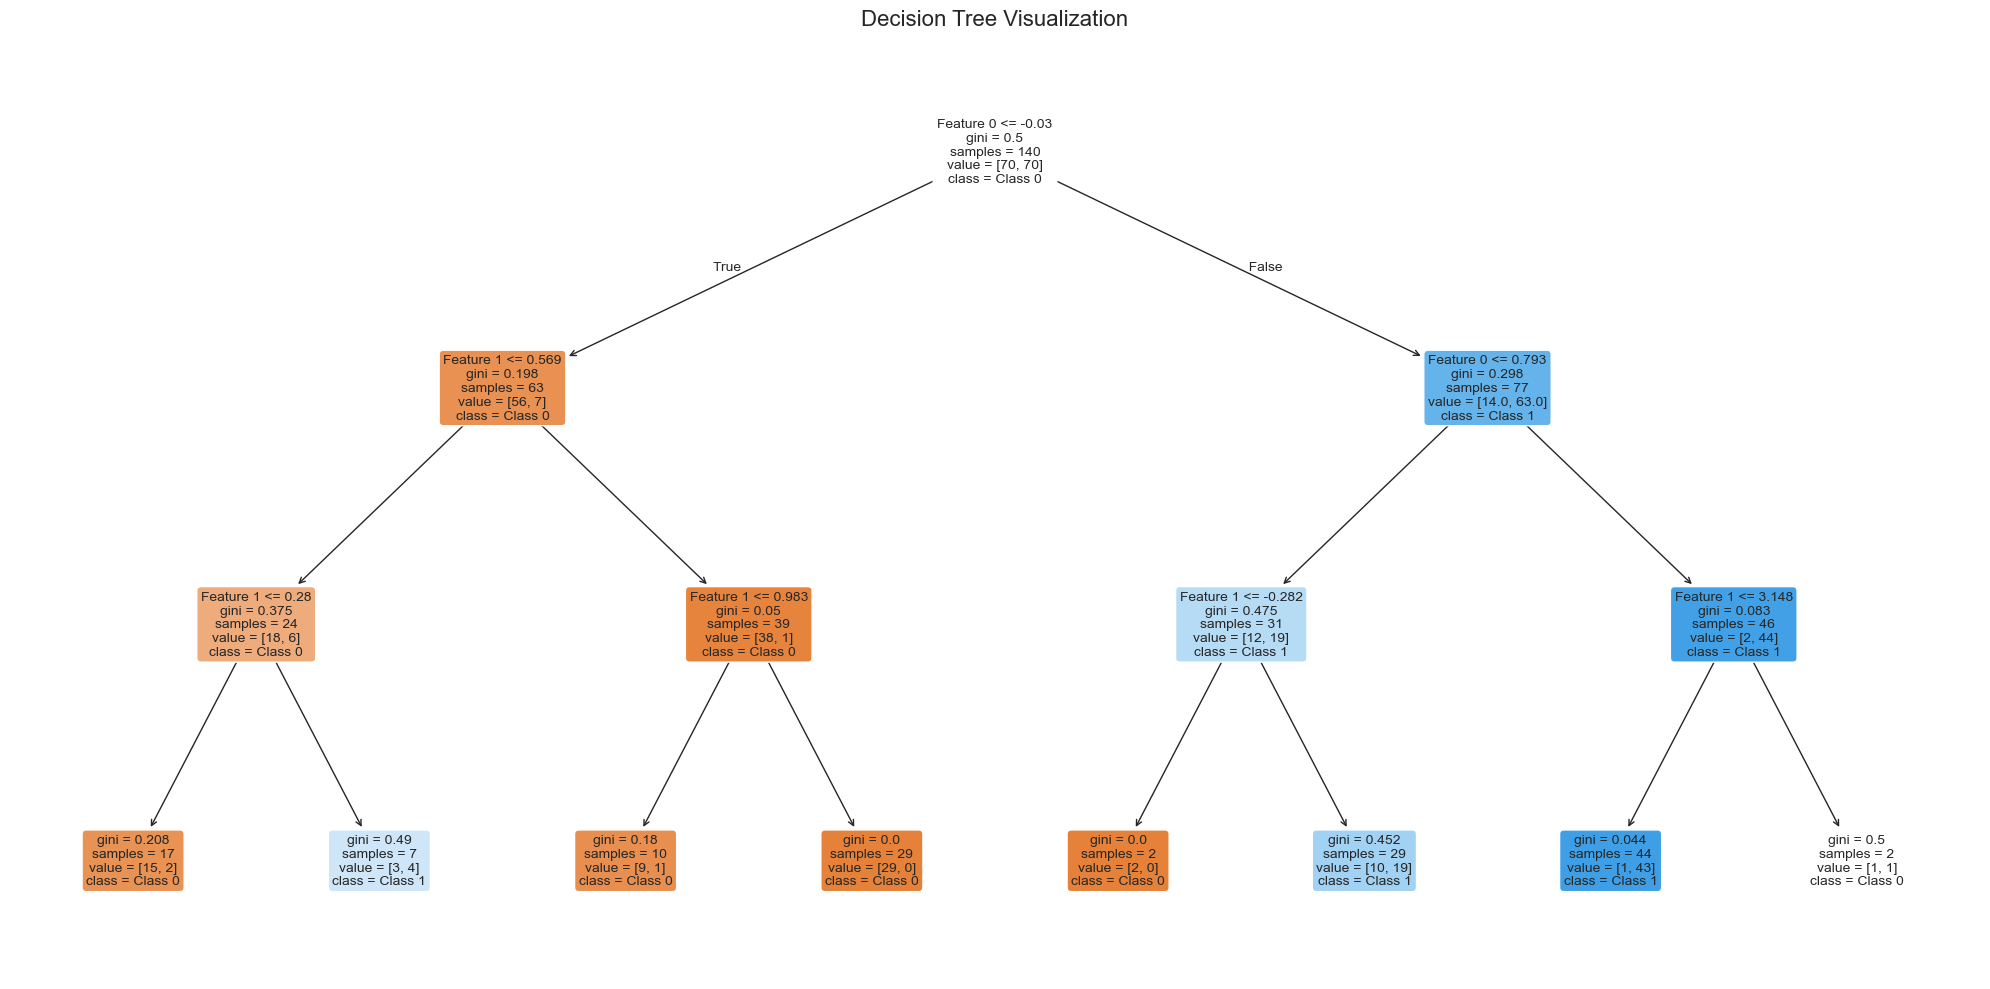


How to Read the Tree:
Each node shows:
  - Splitting condition (e.g., 'Feature 0 <= 0.5')
  - Gini impurity (lower = purer node)
  - Samples: number of samples in node
  - Value: [class 0 count, class 1 count]
  - Class: predicted class (majority vote)

Color intensity indicates class confidence (purity)


In [4]:
# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(
    tree_clf,
    feature_names=['Feature 0', 'Feature 1'],
    class_names=['Class 0', 'Class 1'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Visualization', fontsize=16)
plt.tight_layout()
plt.show()

print("\nHow to Read the Tree:")
print("="*70)
print("Each node shows:")
print("  - Splitting condition (e.g., 'Feature 0 <= 0.5')")
print("  - Gini impurity (lower = purer node)")
print("  - Samples: number of samples in node")
print("  - Value: [class 0 count, class 1 count]")
print("  - Class: predicted class (majority vote)")
print("\nColor intensity indicates class confidence (purity)")

In [5]:
# Text representation
text_rules = export_text(
    tree_clf,
    feature_names=['Feature 0', 'Feature 1']
)

print("Decision Tree Rules (Text Format):")
print("="*70)
print(text_rules)

print("\n💡 This shows the exact decision path the tree follows!")

Decision Tree Rules (Text Format):
|--- Feature 0 <= -0.03
|   |--- Feature 1 <= 0.57
|   |   |--- Feature 1 <= 0.28
|   |   |   |--- class: 0
|   |   |--- Feature 1 >  0.28
|   |   |   |--- class: 1
|   |--- Feature 1 >  0.57
|   |   |--- Feature 1 <= 0.98
|   |   |   |--- class: 0
|   |   |--- Feature 1 >  0.98
|   |   |   |--- class: 0
|--- Feature 0 >  -0.03
|   |--- Feature 0 <= 0.79
|   |   |--- Feature 1 <= -0.28
|   |   |   |--- class: 0
|   |   |--- Feature 1 >  -0.28
|   |   |   |--- class: 1
|   |--- Feature 0 >  0.79
|   |   |--- Feature 1 <= 3.15
|   |   |   |--- class: 1
|   |   |--- Feature 1 >  3.15
|   |   |   |--- class: 0


💡 This shows the exact decision path the tree follows!


### 1.3 Decision Boundary Visualization

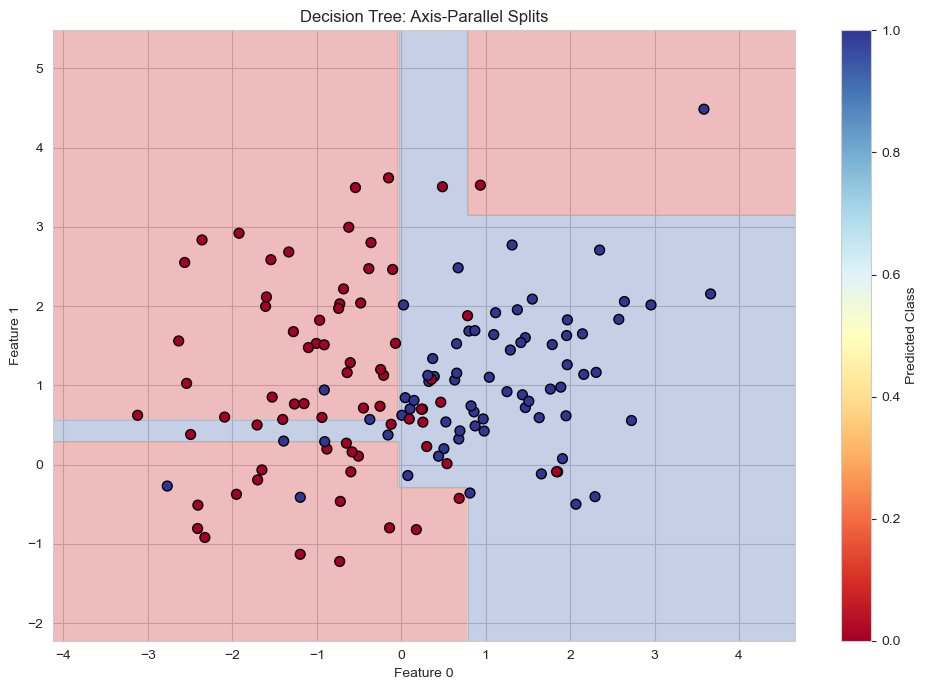


💡 Key Observation:
  Decision trees create RECTANGULAR decision boundaries
  (parallel to feature axes) due to axis-aligned splits.


In [6]:
# Plot decision boundary
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='k', s=50)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title(title)
    plt.colorbar(label='Predicted Class')
    plt.tight_layout()
    plt.show()

plot_decision_boundary(X_train, y_train, tree_clf, 
                      "Decision Tree: Axis-Parallel Splits")

print("\n💡 Key Observation:")
print("  Decision trees create RECTANGULAR decision boundaries")
print("  (parallel to feature axes) due to axis-aligned splits.")

## 2. Multiclass Classification: Iris Dataset

### 2.1 Train and Evaluate

In [7]:
# Load iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print("Iris Dataset - Multiclass Classification")
print("="*70)
print(f"Samples: {X_iris.shape[0]}")
print(f"Features: {X_iris.shape[1]}")
print(f"Feature names: {iris.feature_names}")
print(f"Classes: {iris.target_names}")
print(f"Class distribution: {np.bincount(y_iris)}")

# Split
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

# Train tree
iris_tree = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=5,
    random_state=42
)
iris_tree.fit(X_train_iris, y_train_iris)

# Evaluate
train_acc = iris_tree.score(X_train_iris, y_train_iris)
test_acc = iris_tree.score(X_test_iris, y_test_iris)

print(f"\nModel Performance:")
print(f"  Train Accuracy: {train_acc:.4f}")
print(f"  Test Accuracy:  {test_acc:.4f}")
print(f"  Tree depth: {iris_tree.get_depth()}")
print(f"  Number of leaves: {iris_tree.get_n_leaves()}")

# Predictions
y_pred_iris = iris_tree.predict(X_test_iris)

print(f"\nClassification Report:")
print(classification_report(y_test_iris, y_pred_iris, target_names=iris.target_names))

Iris Dataset - Multiclass Classification
Samples: 150
Features: 4
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Class distribution: [50 50 50]

Model Performance:
  Train Accuracy: 0.9810
  Test Accuracy:  0.9778
  Tree depth: 3
  Number of leaves: 5

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



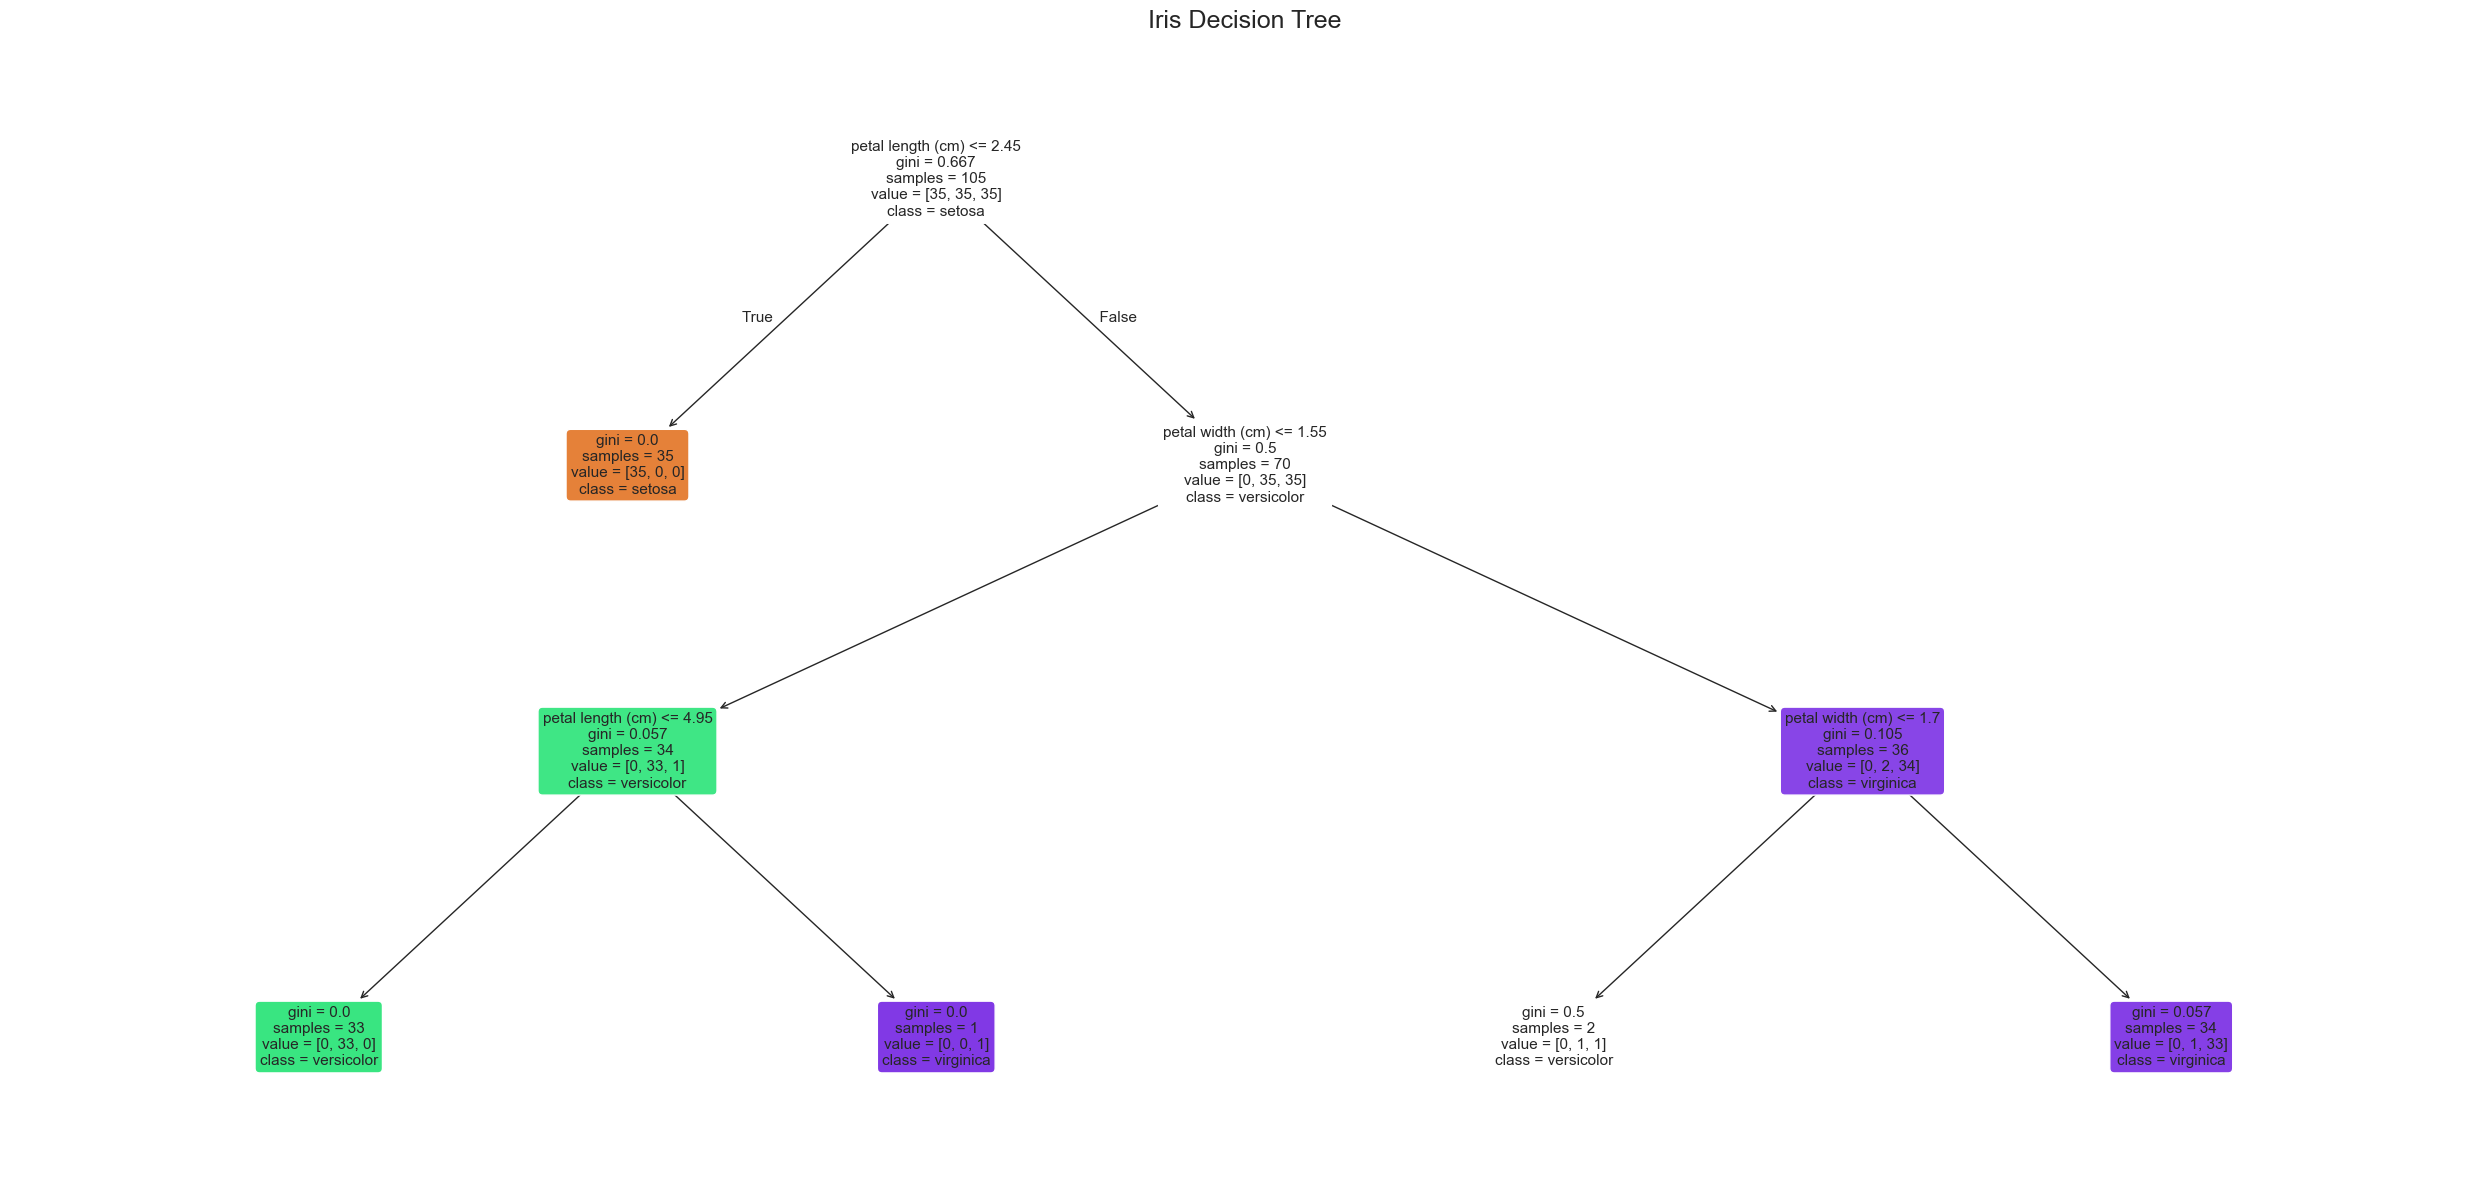

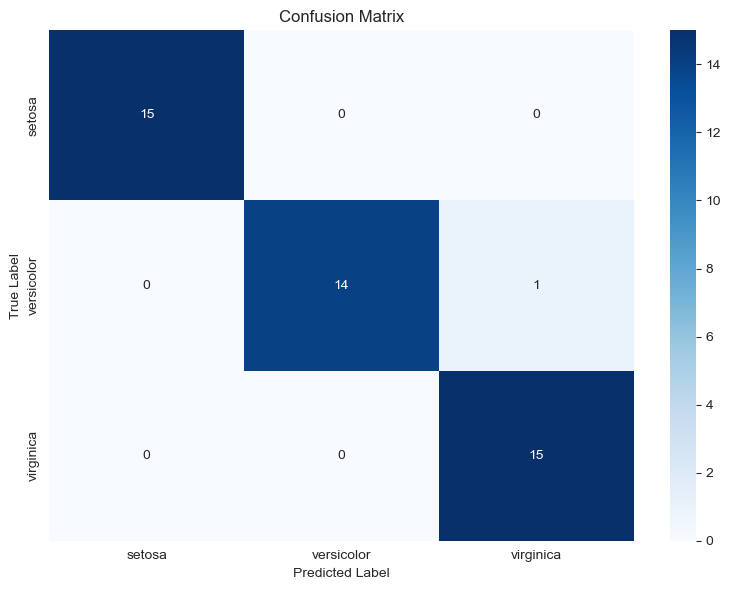

In [8]:
# Visualize iris tree
plt.figure(figsize=(25, 12))
plot_tree(
    iris_tree,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=11
)
plt.title('Iris Decision Tree', fontsize=18)
plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test_iris, y_pred_iris)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### 2.2 Feature Importance

Feature Importance
          Feature  Importance
petal length (cm)    0.550877
 petal width (cm)    0.449123
sepal length (cm)    0.000000
 sepal width (cm)    0.000000


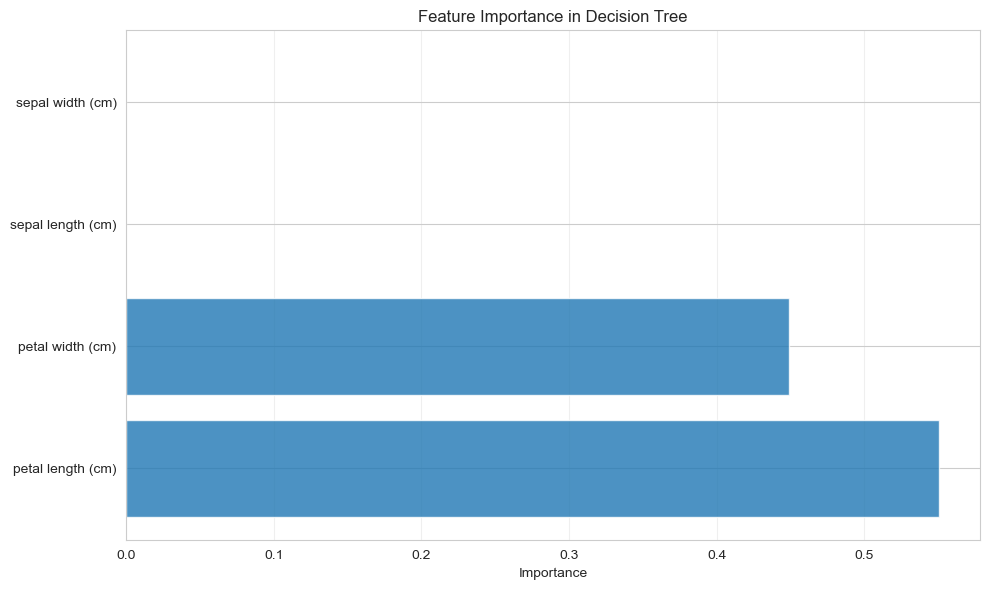


💡 Feature Importance measures:
  How much each feature contributes to reducing impurity
  Sum of all importances = 1.0
  Higher value = more important for classification


In [9]:
# Feature importance
importances = iris_tree.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("Feature Importance")
print("="*70)
print(feature_importance_df.to_string(index=False))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], alpha=0.8)
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n💡 Feature Importance measures:")
print("  How much each feature contributes to reducing impurity")
print("  Sum of all importances = 1.0")
print("  Higher value = more important for classification")

## 3. Decision Tree Regression

### 3.1 Simple 1D Regression Example

1D Regression Data
Samples: 80
Features: 1
Target range: [-1.15, 1.10]


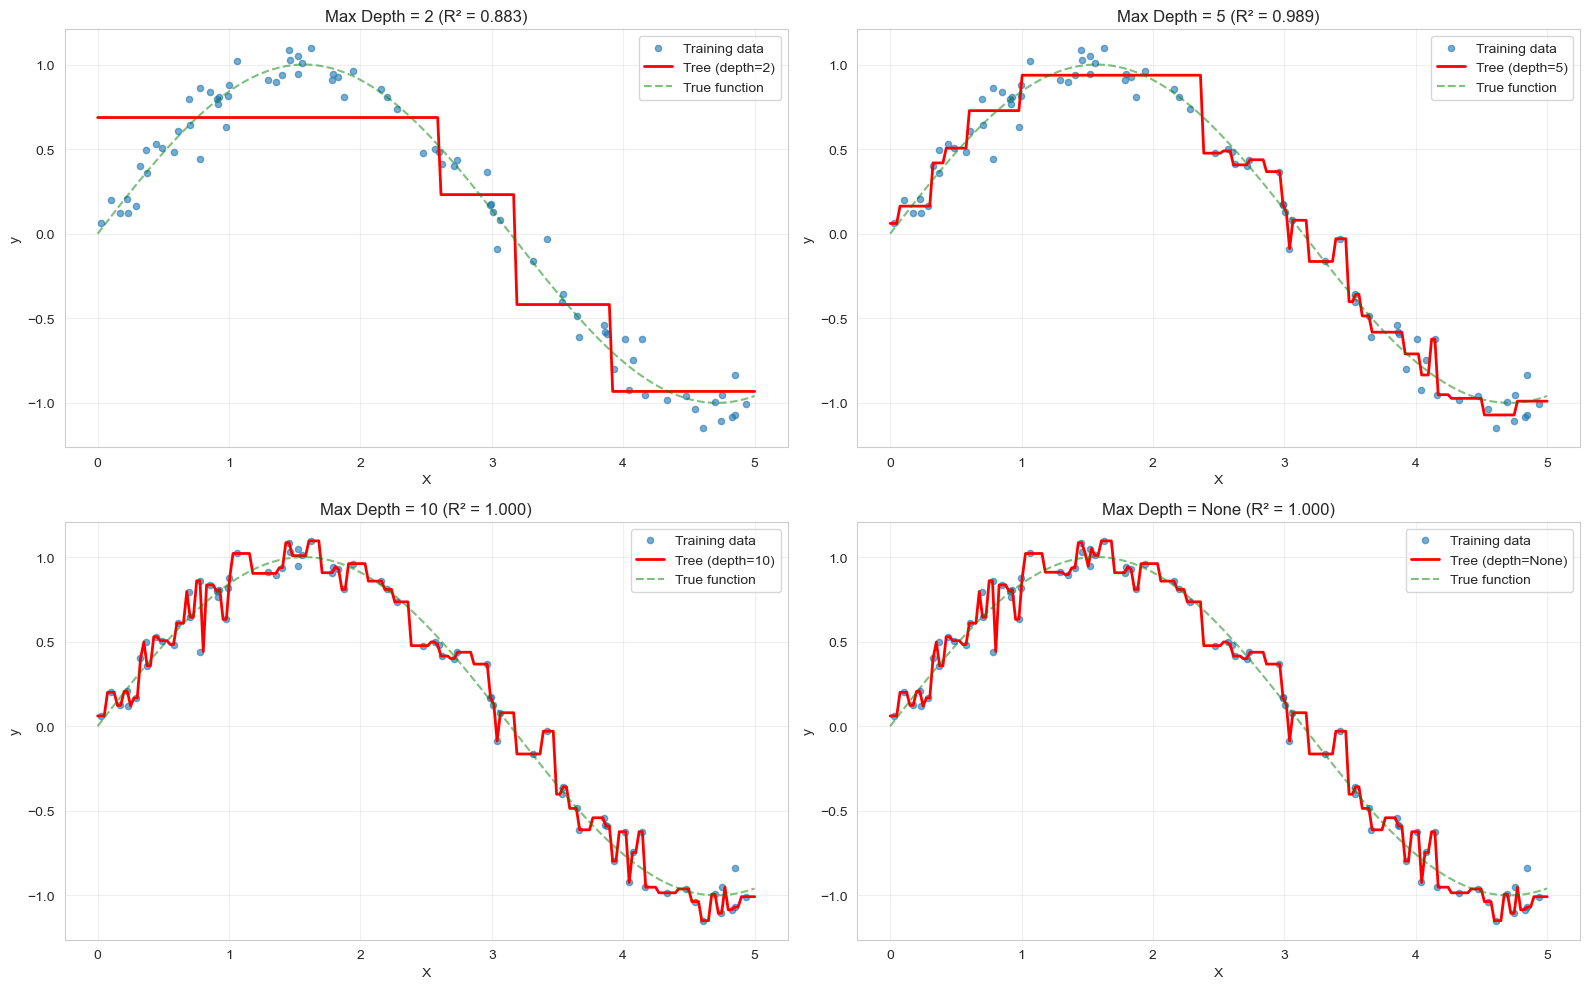


💡 Observations:
  - Depth 2: Underfitting (too simple)
  - Depth 5: Good fit
  - Depth 10: Starting to overfit
  - Depth None: Severe overfitting (memorizing data)

  Note: Predictions are PIECEWISE CONSTANT (step functions)


In [10]:
# Generate non-linear data
np.random.seed(42)
X_reg = np.sort(5 * np.random.rand(80, 1), axis=0)
y_reg = np.sin(X_reg).ravel() + np.random.randn(80) * 0.1

print("1D Regression Data")
print("="*70)
print(f"Samples: {X_reg.shape[0]}")
print(f"Features: {X_reg.shape[1]}")
print(f"Target range: [{y_reg.min():.2f}, {y_reg.max():.2f}]")

# Train trees with different depths
depths = [2, 5, 10, None]
X_test_reg = np.linspace(0, 5, 200).reshape(-1, 1)

plt.figure(figsize=(16, 10))

for i, depth in enumerate(depths, 1):
    plt.subplot(2, 2, i)
    
    # Train tree
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(X_reg, y_reg)
    
    # Predict
    y_pred_reg = tree_reg.predict(X_test_reg)
    
    # Calculate R²
    y_train_pred = tree_reg.predict(X_reg)
    r2 = r2_score(y_reg, y_train_pred)
    
    # Plot
    plt.scatter(X_reg, y_reg, s=20, alpha=0.6, label='Training data')
    plt.plot(X_test_reg, y_pred_reg, 'r-', linewidth=2, 
            label=f'Tree (depth={depth})')
    plt.plot(X_test_reg, np.sin(X_test_reg), 'g--', alpha=0.5, 
            linewidth=1.5, label='True function')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Max Depth = {depth} (R² = {r2:.3f})')
    plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Observations:")
print("  - Depth 2: Underfitting (too simple)")
print("  - Depth 5: Good fit")
print("  - Depth 10: Starting to overfit")
print("  - Depth None: Severe overfitting (memorizing data)")
print("\n  Note: Predictions are PIECEWISE CONSTANT (step functions)")

### 3.2 Real Dataset: Diabetes Regression

In [11]:
# Load diabetes dataset
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

print("Diabetes Dataset")
print("="*70)
print(f"Samples: {X_diabetes.shape[0]}")
print(f"Features: {X_diabetes.shape[1]}")
print(f"Feature names: {diabetes.feature_names}")
print(f"Target: Disease progression (one year after baseline)")

# Split
X_train_db, X_test_db, y_train_db, y_test_db = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

# Train tree
tree_reg_db = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
tree_reg_db.fit(X_train_db, y_train_db)

# Evaluate
y_train_pred_db = tree_reg_db.predict(X_train_db)
y_test_pred_db = tree_reg_db.predict(X_test_db)

train_r2 = r2_score(y_train_db, y_train_pred_db)
test_r2 = r2_score(y_test_db, y_test_pred_db)
train_rmse = np.sqrt(mean_squared_error(y_train_db, y_train_pred_db))
test_rmse = np.sqrt(mean_squared_error(y_test_db, y_test_pred_db))

print(f"\nModel Performance:")
print(f"  Train R²: {train_r2:.4f}")
print(f"  Test R²:  {test_r2:.4f}")
print(f"  Train RMSE: {train_rmse:.2f}")
print(f"  Test RMSE:  {test_rmse:.2f}")
print(f"\n  Tree depth: {tree_reg_db.get_depth()}")
print(f"  Number of leaves: {tree_reg_db.get_n_leaves()}")

Diabetes Dataset
Samples: 442
Features: 10
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target: Disease progression (one year after baseline)

Model Performance:
  Train R²: 0.6553
  Test R²:  0.4390
  Train RMSE: 45.77
  Test RMSE:  54.52

  Tree depth: 5
  Number of leaves: 26


Feature Importance (Diabetes Regression)
Feature  Importance
    bmi    0.591062
     s5    0.207965
     s6    0.050632
     s1    0.042016
     bp    0.038085
     s4    0.024871
     s2    0.018227
     s3    0.017136
    age    0.008161
    sex    0.001845


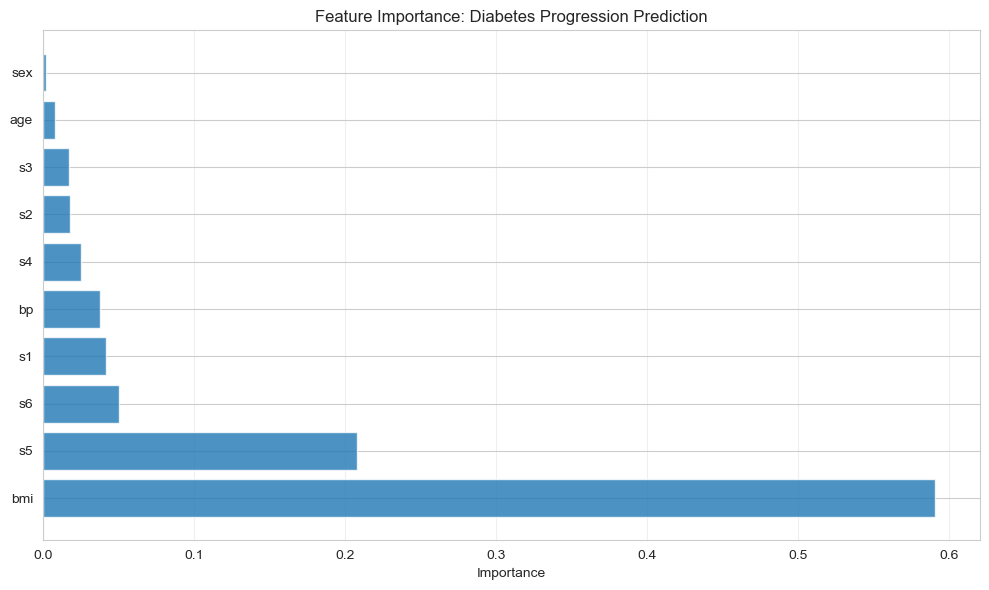

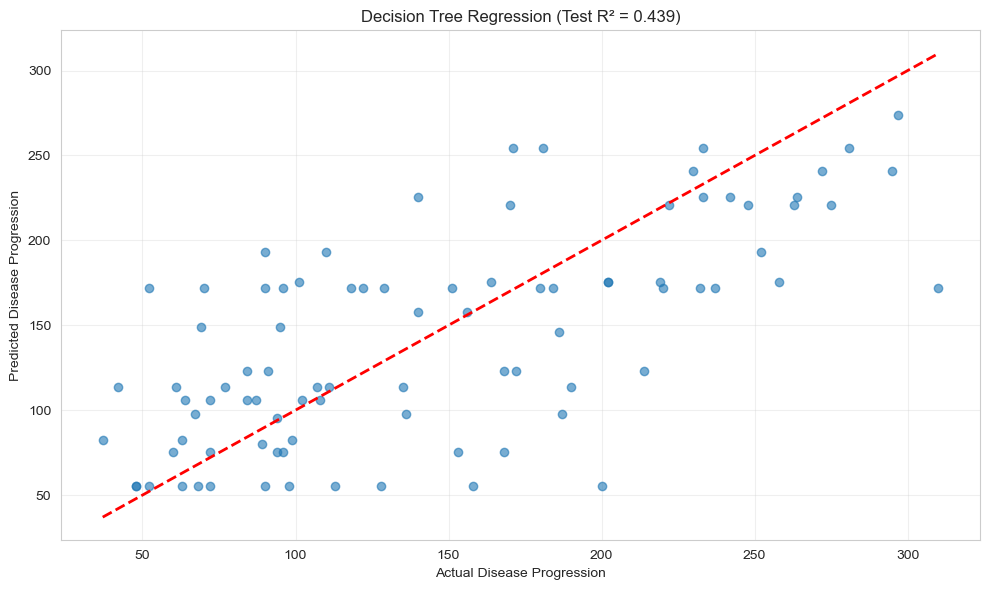

In [12]:
# Feature importance
importances_db = tree_reg_db.feature_importances_
feature_importance_db = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Importance': importances_db
}).sort_values('Importance', ascending=False)

print("Feature Importance (Diabetes Regression)")
print("="*70)
print(feature_importance_db.to_string(index=False))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_db['Feature'], feature_importance_db['Importance'], alpha=0.8)
plt.xlabel('Importance')
plt.title('Feature Importance: Diabetes Progression Prediction')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test_db, y_test_pred_db, alpha=0.6)
plt.plot([y_test_db.min(), y_test_db.max()], 
         [y_test_db.min(), y_test_db.max()], 'r--', lw=2)
plt.xlabel('Actual Disease Progression')
plt.ylabel('Predicted Disease Progression')
plt.title(f'Decision Tree Regression (Test R² = {test_r2:.3f})')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Overfitting and Pruning

### 4.1 Demonstrating Overfitting

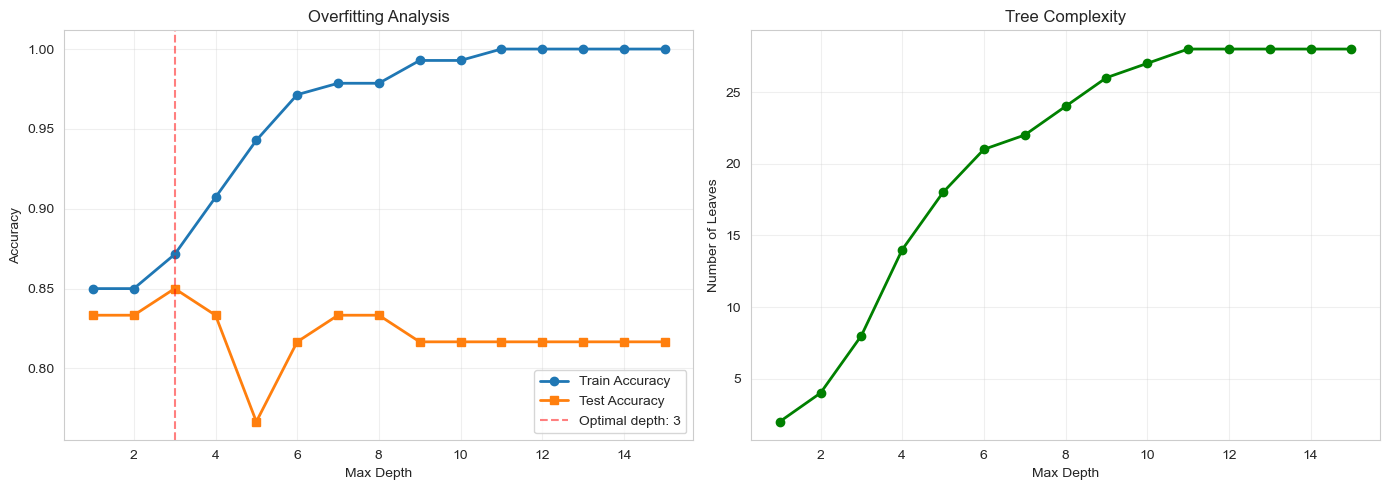

Overfitting Analysis
Optimal depth: 3
Test accuracy at optimal: 0.8500

At max depth (15):
  Train accuracy: 1.0000
  Test accuracy:  0.8167
  Gap: 0.1833 (overfitting!)
  Number of leaves: 28


In [13]:
# Compare different tree depths
depths_to_test = range(1, 16)
train_scores = []
test_scores = []
n_leaves = []

for depth in depths_to_test:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    
    train_scores.append(tree.score(X_train, y_train))
    test_scores.append(tree.score(X_test, y_test))
    n_leaves.append(tree.get_n_leaves())

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy vs depth
axes[0].plot(depths_to_test, train_scores, 'o-', label='Train Accuracy', linewidth=2)
axes[0].plot(depths_to_test, test_scores, 's-', label='Test Accuracy', linewidth=2)
optimal_depth = depths_to_test[np.argmax(test_scores)]
axes[0].axvline(x=optimal_depth, color='r', linestyle='--', alpha=0.5,
               label=f'Optimal depth: {optimal_depth}')
axes[0].set_xlabel('Max Depth')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Overfitting Analysis')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Number of leaves
axes[1].plot(depths_to_test, n_leaves, 'o-', color='green', linewidth=2)
axes[1].set_xlabel('Max Depth')
axes[1].set_ylabel('Number of Leaves')
axes[1].set_title('Tree Complexity')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Overfitting Analysis")
print("="*70)
print(f"Optimal depth: {optimal_depth}")
print(f"Test accuracy at optimal: {max(test_scores):.4f}")
print(f"\nAt max depth (15):")
print(f"  Train accuracy: {train_scores[-1]:.4f}")
print(f"  Test accuracy:  {test_scores[-1]:.4f}")
print(f"  Gap: {train_scores[-1] - test_scores[-1]:.4f} (overfitting!)")
print(f"  Number of leaves: {n_leaves[-1]}")

### 4.2 Pruning via Hyperparameters

In [14]:
print("Key Hyperparameters for Pruning")
print("="*70)

hyperparams = [
    ("max_depth", "Maximum depth of tree", "Lower = simpler tree"),
    ("min_samples_split", "Min samples to split a node", "Higher = simpler tree"),
    ("min_samples_leaf", "Min samples in leaf node", "Higher = simpler tree"),
    ("max_leaf_nodes", "Max number of leaf nodes", "Lower = simpler tree"),
    ("min_impurity_decrease", "Min impurity decrease for split", "Higher = simpler tree"),
]

for param, description, effect in hyperparams:
    print(f"\n{param}:")
    print(f"  Description: {description}")
    print(f"  Effect: {effect}")

# Compare different pruning strategies
pruning_strategies = {
    'No Pruning': DecisionTreeClassifier(random_state=42),
    'max_depth=5': DecisionTreeClassifier(max_depth=5, random_state=42),
    'min_samples_split=20': DecisionTreeClassifier(min_samples_split=20, random_state=42),
    'min_samples_leaf=10': DecisionTreeClassifier(min_samples_leaf=10, random_state=42),
    'Combined': DecisionTreeClassifier(
        max_depth=5, min_samples_split=20, min_samples_leaf=5, random_state=42
    )
}

print("\n" + "="*70)
print("Pruning Strategy Comparison")
print("="*70)

results = []
for name, tree in pruning_strategies.items():
    tree.fit(X_train, y_train)
    train_acc = tree.score(X_train, y_train)
    test_acc = tree.score(X_test, y_test)
    depth = tree.get_depth()
    leaves = tree.get_n_leaves()
    
    results.append({
        'Strategy': name,
        'Train_Acc': train_acc,
        'Test_Acc': test_acc,
        'Depth': depth,
        'Leaves': leaves
    })
    
    print(f"\n{name}:")
    print(f"  Train: {train_acc:.4f}, Test: {test_acc:.4f}")
    print(f"  Depth: {depth}, Leaves: {leaves}")

results_df = pd.DataFrame(results)
print("\n" + "="*70)
print("Summary:")
print(results_df.to_string(index=False))

Key Hyperparameters for Pruning

max_depth:
  Description: Maximum depth of tree
  Effect: Lower = simpler tree

min_samples_split:
  Description: Min samples to split a node
  Effect: Higher = simpler tree

min_samples_leaf:
  Description: Min samples in leaf node
  Effect: Higher = simpler tree

max_leaf_nodes:
  Description: Max number of leaf nodes
  Effect: Lower = simpler tree

min_impurity_decrease:
  Description: Min impurity decrease for split
  Effect: Higher = simpler tree

Pruning Strategy Comparison

No Pruning:
  Train: 1.0000, Test: 0.8167
  Depth: 11, Leaves: 28

max_depth=5:
  Train: 0.9429, Test: 0.7667
  Depth: 5, Leaves: 18

min_samples_split=20:
  Train: 0.8929, Test: 0.7833
  Depth: 5, Leaves: 11

min_samples_leaf=10:
  Train: 0.8571, Test: 0.8000
  Depth: 4, Leaves: 9

Combined:
  Train: 0.8643, Test: 0.8000
  Depth: 4, Leaves: 9

Summary:
            Strategy  Train_Acc  Test_Acc  Depth  Leaves
          No Pruning   1.000000  0.816667     11      28
         ma

## 5. Hyperparameter Tuning with GridSearchCV

### 5.1 Comprehensive Grid Search

In [15]:
# Grid search for best hyperparameters
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("GridSearchCV: Finding Best Hyperparameters")
print("="*70)
print(f"Parameter grid: {len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['criterion'])} combinations")
print(f"Cross-validation folds: 5")
print("\nSearching...\n")

grid_search.fit(X_train, y_train)

print("\nBest Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest CV Score: {grid_search.best_score_:.4f}")

# Evaluate on test set
best_tree = grid_search.best_estimator_
test_acc = best_tree.score(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

print(f"\nBest Tree Properties:")
print(f"  Depth: {best_tree.get_depth()}")
print(f"  Leaves: {best_tree.get_n_leaves()}")

GridSearchCV: Finding Best Hyperparameters
Parameter grid: 160 combinations
Cross-validation folds: 5

Searching...

Fitting 5 folds for each of 160 candidates, totalling 800 fits

Best Parameters:
  criterion: gini
  max_depth: 3
  min_samples_leaf: 10
  min_samples_split: 2

Best CV Score: 0.8143
Test Accuracy: 0.8000

Best Tree Properties:
  Depth: 3
  Leaves: 8


## 6. Real-World Application: Breast Cancer Detection

### 6.1 Complete Pipeline

Breast Cancer Detection with Decision Trees
Samples: 569
Features: 30
Classes: ['malignant' 'benign']
Class distribution: Malignant=212, Benign=357

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 5}
Best CV AUC: 0.9658

Test Performance:
  Accuracy: 0.9474
  AUC: 0.9901

Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        42
      benign       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



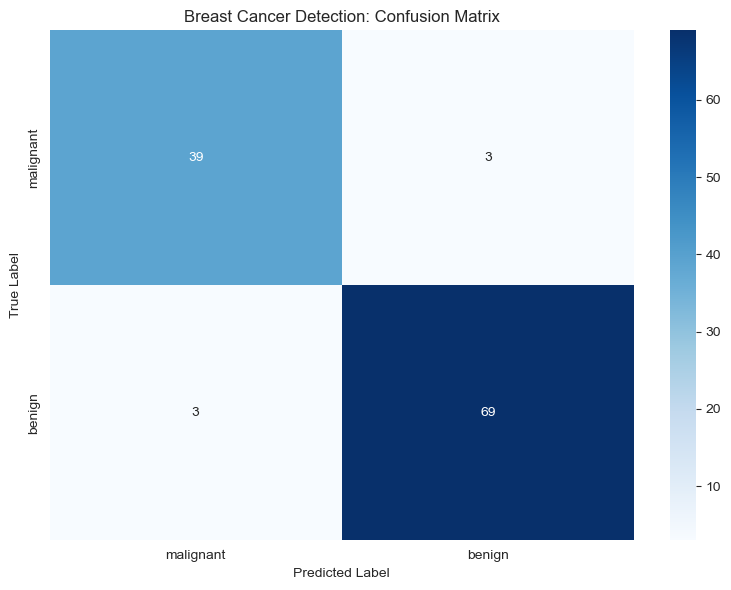

In [16]:
# Load breast cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

print("Breast Cancer Detection with Decision Trees")
print("="*70)
print(f"Samples: {X_cancer.shape[0]}")
print(f"Features: {X_cancer.shape[1]}")
print(f"Classes: {cancer.target_names}")
print(f"Class distribution: Malignant={np.sum(y_cancer==0)}, Benign={np.sum(y_cancer==1)}")

# Split
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

# Simplified grid search
param_grid_cancer = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10]
}

grid_cancer = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_cancer,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_cancer.fit(X_train_cancer, y_train_cancer)

print(f"\nBest Parameters: {grid_cancer.best_params_}")
print(f"Best CV AUC: {grid_cancer.best_score_:.4f}")

# Evaluate
best_cancer_tree = grid_cancer.best_estimator_
y_pred_cancer = best_cancer_tree.predict(X_test_cancer)

from sklearn.metrics import roc_auc_score
y_proba_cancer = best_cancer_tree.predict_proba(X_test_cancer)[:, 1]
test_auc = roc_auc_score(y_test_cancer, y_proba_cancer)

print(f"\nTest Performance:")
print(f"  Accuracy: {accuracy_score(y_test_cancer, y_pred_cancer):.4f}")
print(f"  AUC: {test_auc:.4f}")

print(f"\nClassification Report:")
print(classification_report(y_test_cancer, y_pred_cancer, 
                          target_names=cancer.target_names))

# Confusion matrix
cm = confusion_matrix(y_test_cancer, y_pred_cancer)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Breast Cancer Detection: Confusion Matrix')
plt.tight_layout()
plt.show()

Top 15 Features for Cancer Detection
                Feature  Importance
           worst radius    0.787977
   worst concave points    0.130592
          worst texture    0.073339
             area error    0.007112
        worst concavity    0.000980
            mean radius    0.000000
        concavity error    0.000000
         worst symmetry    0.000000
      worst compactness    0.000000
       worst smoothness    0.000000
             worst area    0.000000
        worst perimeter    0.000000
fractal dimension error    0.000000
         symmetry error    0.000000
   concave points error    0.000000


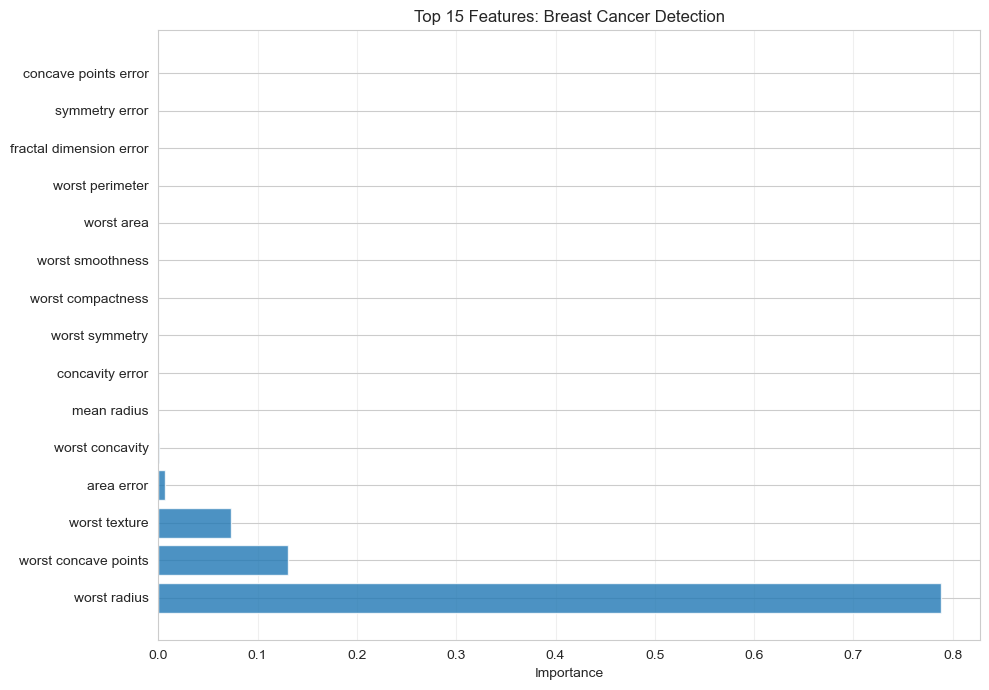

In [17]:
# Top features for cancer detection
importances_cancer = best_cancer_tree.feature_importances_
feature_importance_cancer = pd.DataFrame({
    'Feature': cancer.feature_names,
    'Importance': importances_cancer
}).sort_values('Importance', ascending=False).head(15)

print("Top 15 Features for Cancer Detection")
print("="*70)
print(feature_importance_cancer.to_string(index=False))

# Plot
plt.figure(figsize=(10, 7))
plt.barh(feature_importance_cancer['Feature'], 
        feature_importance_cancer['Importance'], alpha=0.8)
plt.xlabel('Importance')
plt.title('Top 15 Features: Breast Cancer Detection')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## Summary and Best Practices

### Quick Reference

```python
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Classification
clf = DecisionTreeClassifier(
    criterion='gini',       # or 'entropy'
    max_depth=5,           # Limit tree depth
    min_samples_split=10,  # Min samples to split
    min_samples_leaf=5,    # Min samples in leaf
    random_state=42
)

# Regression
reg = DecisionTreeRegressor(
    criterion='squared_error',  # or 'absolute_error'
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
```

### Advantages

✓ **Interpretable**: Easy to visualize and understand
✓ **No scaling needed**: Handles features at different scales
✓ **Handles non-linearity**: Captures complex patterns
✓ **Mixed data types**: Works with numerical and categorical
✓ **Feature importance**: Built-in feature selection
✓ **Fast prediction**: O(log n) complexity

### Disadvantages

❌ **Overfitting**: Tends to overfit without pruning
❌ **Instability**: Small data changes = different tree
❌ **Bias**: Biased toward features with more levels
❌ **Poor extrapolation**: Cannot predict beyond training range
❌ **Axis-parallel splits**: Cannot learn diagonal boundaries well

### Best Practices

1. ✓ **Always limit depth** (`max_depth=5-10` is often good)
2. ✓ **Use pruning parameters** to prevent overfitting
3. ✓ **Cross-validate** to find optimal hyperparameters
4. ✓ **Visualize trees** for interpretability
5. ✓ **Check feature importance** to understand model
6. ✓ **Use ensembles** (Random Forest, Gradient Boosting) for better performance
7. ✓ **Monitor train vs test** to detect overfitting

### Key Hyperparameters

| Parameter | Description | Typical Values |
|-----------|-------------|----------------|
| `max_depth` | Maximum tree depth | 3-10 |
| `min_samples_split` | Min samples to split | 2-20 |
| `min_samples_leaf` | Min samples per leaf | 1-10 |
| `max_leaf_nodes` | Max leaf nodes | 10-100 |
| `criterion` | Split quality measure | 'gini', 'entropy' |

### Next Steps

- Random Forests (ensemble of trees)
- Gradient Boosting (sequential trees)
- XGBoost, LightGBM, CatBoost
- Feature engineering for trees
- Model interpretation (SHAP values)